# 1. Introduction

The IllustrisTNG project is an ongoing series of large, cosmological magnetohydrodynamical simulations of galaxy formation. These simulations can be used to study a broad range of topics surrounding how the Universe  - and the galaxies within it - evolved over time. As of today, there are 18 runs with 651.1 TB total data volume. In order to utilize this data, understanding the navigation method and meaning of the data is essential. 

# 2. Public Data Access

There are three ways to access the public data:

1. Downloading the raw data files in order to work completely on the local system.
2. Using the online API to retrieve specific galaxies/halos of interest without needing to download any full datafiles. 
3. Launching a web-based JupyterLab (Jupyter Notebook) session, in order to work completely on the remote system. 

As previously mentioned, there are 651.1 TB total data volume, therefore option 1 is not efficient. As for option 3, the IllustrisTNG Project team has to give permission to an individual's research/project.
	
In this document, we will focus on option 2, primarily focusing on the Python programming language. 

# 3. Navigating the API

## 3.1 Basic Information

Let's import the required packages first

In [1]:
import requests                 # To use the helper function "get"
import h5py                     # To read .hdf5 files in Python
import matplotlib.pyplot as mpl # To plot using the data from .hdf5 fiels
from skimage import io          # To work with images
import numpy as np              # To calculate big numerical data
import cv2                      # To create video
import os                       # To navigate the working directory

The base URL and the API key is given so that we can access the API Root. Note that the API Key will be different from what's given here.

In [2]:
baseUrl = 'http://www.tng-project.org/api/'               # URL to the API Root
headers = {"api-key":"your_key_here"}  # API Key required to access the database. Make sure to change this!

## 3.2 Making a request to an URL

This is a helper function that we'll be using to navigate the API.

In [3]:
def get(path, params=None): # This is provided by the IllustrisTNG Project
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically

    if 'content-disposition' in r.headers:
        filename = r.headers['content-disposition'].split("filename=")[1]
        with open(filename, 'wb') as f:
            f.write(r.content)
        return filename # return the filename string

    return r

To make the request to an URL, use the helper function "get." Let's make the request to the API Root.

In [4]:
# General rule is this: variableName = get(string URL)
root = get(baseUrl)

That's it! We're in the API Root. Now, let's take a deeper look at what each page is telling us. 

# 4. Data structure of IllustrisTNG

Now that we are in the database, we can start looking at the actual data and understand what it is telling us. Note that from calling the get function in the previous section, the variable *root* has the information of the API Root.  

## 4.1 API Root

API Root should contain a dictionary with one key, named _simulations_ , which is a list of all simulations provided by the IllustrisTNG team. But before, let's check the keys to make sure we made it to the Root.

In [5]:
root.keys()

dict_keys(['simulations'])

Or to see the result directly, call the variable like so:

In [6]:
root

{'simulations': [{'name': 'Illustris-1',
   'num_snapshots': 134,
   'url': 'http://www.tng-project.org/api/Illustris-1/'},
  {'name': 'Illustris-1-Dark',
   'num_snapshots': 136,
   'url': 'http://www.tng-project.org/api/Illustris-1-Dark/'},
  {'name': 'Illustris-2',
   'num_snapshots': 136,
   'url': 'http://www.tng-project.org/api/Illustris-2/'},
  {'name': 'Illustris-2-Dark',
   'num_snapshots': 136,
   'url': 'http://www.tng-project.org/api/Illustris-2-Dark/'},
  {'name': 'Illustris-3',
   'num_snapshots': 136,
   'url': 'http://www.tng-project.org/api/Illustris-3/'},
  {'name': 'Illustris-3-Dark',
   'num_snapshots': 136,
   'url': 'http://www.tng-project.org/api/Illustris-3-Dark/'},
  {'name': 'TNG100-1',
   'num_snapshots': 100,
   'url': 'http://www.tng-project.org/api/TNG100-1/'},
  {'name': 'TNG100-1-Dark',
   'num_snapshots': 100,
   'url': 'http://www.tng-project.org/api/TNG100-1-Dark/'},
  {'name': 'TNG100-2',
   'num_snapshots': 100,
   'url': 'http://www.tng-project.org

This page is where the user can select specific simulations of interest. The only value in the dictionary is an array of dictionary objects, which includes the simulation name, number of snapshots in that simulation, and URL link to that simulation page. For instance, simulation _TNG100-1_ has 100 snapshots and the URL to the Simulation Detail is given in the key.

    Note: If you have the API Key, you can actually go to the link given by the base URL. It will lead to the Browsable API. 
    
In this document, we'll focus on the TNG100-1 simulation, so let's look for it and use the url provided to navigate there.

In [7]:
names = [sim['name'] for sim in root['simulations']]
i = names.index('TNG100-1')
i

6

The simulation of our interest is located in the index 6. Let's navigate there.

In [8]:
# root['simulations'][i]['url'] contains the URL to the Simulation Detail page. 
sim = get(root['simulations'][i]['url'])

## 4.2 Simulation Detail

Let's see what the variable *sim* contains. 

In [9]:
sim

{'name': 'TNG100-1',
 'description': 'Main high-resolution IllustrisTNG100 run including the full TNG physics model.',
 'name_alt': 'L75n1820TNG',
 'boxsize': 75000.0,
 'z_start': 127.0,
 'z_final': 0.0,
 'cosmology': 'Planck2015',
 'omega_0': 0.3089,
 'omega_L': 0.6911,
 'omega_B': 0.0486,
 'hubble': 0.6774,
 'physics_model': 'Fiducial TNG Model',
 'has_cooling': True,
 'has_starformation': True,
 'has_winds': True,
 'has_blackholes': True,
 'mass_gas': 9.43946e-05,
 'mass_dm': 0.000505574296436975,
 'softening_dm_comoving': 1.0,
 'softening_stars_comoving': 1.0,
 'softening_blackholes_comoving': 1.0,
 'softening_gas_comoving': 1.0,
 'softening_dm_max_phys': 0.5,
 'softening_stars_max_phys': 0.5,
 'softening_blackholes_max_phys': 1.0,
 'softening_gas_max_phys': 0.5,
 'softening_gas_factor': 2.5,
 'softening_gas_comoving_min': 0.125,
 'num_dm': 6028568000,
 'num_tr_mc': 0,
 'num_tr_vel': 0,
 'longids': True,
 'is_uniform': True,
 'is_zoom': False,
 'is_subbox': False,
 'num_files_snaps

Just like the API Root, Simulation Detail page is also a dictionary of information about the simulation. In this case, this page has all the metadata for the *TNG-100* Simulation.

Most of the information that's given here can also be found in this page here: https://www.tng-project.org/data/downloads/TNG100-1/

However, some of the variables used in the API may not be as intuitive to match with the ones from the link. Here are some variables that are equivalent to the ones in the link:
    
    simulation name = 'name'
    side length of simulation box = 'boxsize'
    starting redshift = 'z_start'
    ending redshift = 'z_final'
    short description of cosmological parameters = 'cosmology'
    total matter density = 'omega_0'
    dark energy density = 'omega_L'
    baryonic matter density = 'omega_B'
    hubble constant = 'hubble'
    number of dark matter particles = 'num_dm' (Note: 'dm' usually refers to dark matter)
    

For our project, we want specific pictures of galaxies (subhalos). Maybe the **snapshots** link is appropriate - let's navigate there.

In [10]:
#sim['snapshots'] has the URL to the snapshots
snaps = get(sim['snapshots'])
len(snaps)

100

Looks like there are 100 snapshots for this simulation. Let's see what *snap* is an array of.

## 4.3 Snapshot List

In [11]:
snaps

[{'number': 0,
  'redshift': 20.0464909888075,
  'num_groups_subfind': 537,
  'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/0/'},
 {'number': 1,
  'redshift': 14.9891732400424,
  'num_groups_subfind': 62357,
  'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/1/'},
 {'number': 2,
  'redshift': 11.9802133153003,
  'num_groups_subfind': 497420,
  'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/2/'},
 {'number': 3,
  'redshift': 10.9756432941379,
  'num_groups_subfind': 877320,
  'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/3/'},
 {'number': 4,
  'redshift': 9.99659046618633,
  'num_groups_subfind': 1433428,
  'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/4/'},
 {'number': 5,
  'redshift': 9.38877127194055,
  'num_groups_subfind': 1884988,
  'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/5/'},
 {'number': 6,
  'redshift': 9.00233985416247,
  'num_groups_subfind': 2213125,
  'url': 'http://www.tng-project.org/api/TNG100-1/sn

Turns out, *snaps* is an array of dictionaries consisting of the snapshot number, its redshift, group subfind number, and url to this snapshot. Array is sorted so that the redshift is decreasing, from $z=20$ to $z=0$. Conveniently, each snapshot dictionary element provides the URL to that snapshot. 
    
        Note: Decreasing redshift means it's moving forward in time, and z=0 represents present day.
        
Let's investigate the snapshot where $z=0$, which is in the last element of the array.

## 4.4 Snapshot Detail

In [12]:
snaps[-1]

{'number': 99,
 'redshift': 2.22044604925031e-16,
 'num_groups_subfind': 4371211,
 'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/'}

Let's navigate to the Snapshot Detail page, using the url provided. 

In [13]:
snap = get(snaps[-1]['url'])
snap

{'simulation': 'http://www.tng-project.org/api/TNG100-1/',
 'number': 99,
 'redshift': 2.22044604925031e-16,
 'num_gas': 5453610043,
 'num_dm': 6028568000,
 'num_trmc': 12057136000,
 'num_stars': 453723346,
 'num_bhs': 37053,
 'num_groups_fof': 6291349,
 'num_groups_subfind': 4371211,
 'num_groups_rockstar': 0,
 'filesize_snapshot': 1852107755772.0,
 'filesize_groupcat': 4446214808.0,
 'filesize_rockstar': 0.0,
 'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/',
 'subhalos': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/',
 'vis': {'groupcat_sfms': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/plot.png?xQuant=mstar2_log&yQuant=ssfr&xlim=9.0%2C11.0',
  'groupcat_sizemass': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/plot.png?xQuant=mstar2_log&yQuant=size_stars',
  'groupcat_mz_gas': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/plot.png?xQuant=mstar2_log&yQuant=Z_gas',
  'groupcat_mz_stars': 'http://www.t

This gives us more detailed information about this snapshot. Just like before, here are variables that are equivalent to the items from the provided link from section 4.2:
    
        Number of Gas Cells = 'num_gas'
        Number of Stars = 'num_stars'
        Number of Black Holes (BHs) = 'num_bhs'
        Number of FoF Groups = 'num_groups_fof'
        Number of Subfind Groups = 'num_groups_subfind'
        File size of the Snapshot (in Bytes) = 'filesize_snapshot'
        File size of the Group Catalog (in Bytes) = 'filesize_groupcat'
        
In addition, this page provides the following:       
 
    - As usual, this dictionary contains the 'url' key that gives the link to the current page. 
    - The 'subhalos' key provides the URL to the Subhalo List page, which will be explained in the next subsection.
    - The 'vis' key provides a dictionary object to visual graphs of Group Catalogs, and each link leads to a .png  
       graph, depends on the parameters (Sizemass, Gas, Stars, etc.).
    - We're interested in the subhalos (galaxies) within this snaps, so let's navigate to Subhalo List page.

In [14]:
subs = get(snap['subhalos'])

## 4.5 Subhalo List

Let's see what this page contains.

In [15]:
subs

{'count': 4371211,
 'next': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/?limit=100&offset=100',
 'previous': None,
 'results': [{'id': 0,
   'sfr': 2.22719,
   'mass_log_msun': 14.60813834636778,
   'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/0/'},
  {'id': 1,
   'sfr': 0.413285,
   'mass_log_msun': 13.733420710710462,
   'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/1/'},
  {'id': 2,
   'sfr': 17.3922,
   'mass_log_msun': 13.057590420489898,
   'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/2/'},
  {'id': 3,
   'sfr': 5.07938,
   'mass_log_msun': 12.699524859399856,
   'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/3/'},
  {'id': 4,
   'sfr': 1.41469,
   'mass_log_msun': 12.681528310672475,
   'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/4/'},
  {'id': 5,
   'sfr': 0.886559,
   'mass_log_msun': 12.643397303528015,
   'url': 'http://www.tng-project

Think of this page like an unsorted listing of all subhalos in the snapshot. 

    'count' key indicates how many subhalos are in this snapshot. In this case, there are 4371211 subhalos.

    'id' is a unique identification number for subhalo in this snapshot. 

    'sfr' is Star Formation Rate

    'mass_log_msun' is the mass of the subhalo in log scale
    
Note: mass_log_msun = $\log_{10}{(\text{mass}*10^{10}/\text{hubble constant})}$

You can go to the 'next' and 'previous' link to look for more subhalos, or you can apply some filters to limit the amount of subhalos per page.

For instance, we can reqest the first twenty subhalos at this snapshot, sorted by descending stellar mass

In [16]:
subs = get(snap['subhalos'], {'limit':20, 'order_by':'-mass_stars'})
len(subs['results'])

20

To be clear, the URL we requested was:
www.tng-project.org/api/Illustris-3/snapshots/99/subhalos/?limit=20&order_by=-mass_stars

Let's get a listing of the top 5 subhalos (galaxy members), in order of decreasing mass.

In [17]:
 [subs['results'][i]['id'] for i in range(6) ]

[0, 31342, 17185, 69507, 83280, 88663]

The most massive subhalo has id of 0, and has most stars. The next ID (31342) is likely a central subhalo of a subsequent FoF halo. Let's get a full subhalo information.

In [18]:
sub = get( subs['results'][1]['url'] )

## 4.6 Subhalo Detail 

In [19]:
sub

{'snap': 99,
 'id': 31342,
 'bhmdot': 0.000372323,
 'cm_x': 10990.5,
 'cm_y': 50821.3,
 'cm_z': 47615.9,
 'gasmetallicity': 0.0057079,
 'gasmetallicityhalfrad': 0.00606772,
 'gasmetallicitymaxrad': 0.00415039,
 'gasmetallicitysfr': 0.0122573,
 'gasmetallicitysfrweighted': 0.0124803,
 'pos_x': 10900.2,
 'pos_y': 50857.9,
 'pos_z': 47590.4,
 'halfmassrad': 520.023,
 'halfmassrad_gas': 537.616,
 'halfmassrad_dm': 520.114,
 'halfmassrad_stars': 58.3731,
 'halfmassrad_bhs': 0.0,
 'len': 74949167,
 'len_gas': 32956555,
 'len_dm': 38977315,
 'len_stars': 3015291,
 'len_bhs': 6,
 'mass': 23211.3,
 'mass_gas': 3312.6,
 'mass_dm': 19705.9,
 'mass_stars': 191.961,
 'mass_bhs': 0.839029,
 'massinhalfrad': 678.463,
 'massinhalfrad_gas': 17.5206,
 'massinhalfrad_dm': 564.123,
 'massinhalfrad_stars': 95.9805,
 'massinhalfrad_bhs': 0.838334,
 'massinmaxrad': 13940.5,
 'massinmaxrad_gas': 1999.19,
 'massinmaxrad_dm': 11761.7,
 'massinmaxrad_stars': 178.749,
 'massinmaxrad_bhs': 0.83874,
 'massinrad': 1

This page shows details for one subhalo in this particular snapshot. In this case, we're currently looking at snapshot 99 ($z=0$) and Subhalo ID 31342.

A few keys to pay attention to:

    'related' key gives the url link to the progenitor subhalo, descendent subhalo, and parent halo
    'cutouts' provides .hdf5 files to the subhalo itself and the parent halo
    'trees' provide .hdf5 files of the merger trees. More on this on next section. 
    'supplementary_data' provides additional links to the .png files and .fits files to additional data.
    'vis' provides the .png files to the subhalo, including the sublink merger tree. 
    'meta' provides the url link to itself, snapshot data page, simulation details page, and .json file to the subhalo itself

If you're interested in the history of the subhalo, pay attention to the following key:

    'desc_sfid' provides the ID of the descendent subhalo. If one doesn't exist, its value is -1. 
    'desc_snap' provides the snapshot number of the descendent subhalo. If it doesn't exist, its value is -1. 
    'prog_sfid' provides the ID of the progenitor subhalo. If it doesn't exist, its value is -1.
    'prog_snap' provides the snapshot number of the progenitor subhalo. If it doesn't exist, its value is -1.
    
For example, this subhalo does not have a descendent, but its progenitor subhalo ID is 31158 in snapshot 98.

The *related['sublink_progenitor']* provides the url link to the progenitor subhalo directly.

We also have *id* = 31342, a good sanity check. *grnr* = 2 indicates that this subhalo is a member of FoF 2. *primary_flag* = 1 indicates that this is the central (i.e. most massive, or "primary") subhalo of this FoF halo.

## 4.7 Merger Trees
 

This is not a new page in the database, but it's another dictionary object in Subhalo Detalis page. 

There are six types of merger trees. Five of them are given in .hdf5 format, and other one is in .json format. 

Four of the merger trees are sublink, and two are LHaloTree.
Note the following postfix:
    
        mpb - Main Progenitor Branch, given in .hdf5 format
        mdb - Main Descencdent Branch, given in .hdf5 format
        simple - Simple sublink tree, given in .json format. You can open this in the browser to see the history of the main subhalo and the merger subhalos. 
        
        
Let's compare some of these merger trees. First, let's examine the simple Sublink merger tree:
        

In [20]:
simple = get(sub['trees']['sublink_simple'])
simple['Main']

[[99, 31342],
 [98, 31158],
 [97, 30615],
 [96, 27447],
 [95, 26661],
 [94, 26737],
 [93, 26782],
 [92, 26595],
 [91, 26516],
 [90, 26358],
 [89, 26369],
 [88, 26170],
 [87, 26224],
 [86, 25606],
 [85, 25376],
 [84, 25313],
 [83, 24793],
 [82, 24716],
 [81, 24116],
 [80, 10604],
 [79, 0],
 [78, 0],
 [77, 0],
 [76, 8178],
 [75, 8219],
 [74, 8111],
 [73, 8046],
 [72, 7719],
 [71, 7588],
 [70, 7516],
 [69, 7417],
 [68, 7421],
 [67, 7306],
 [66, 7313],
 [65, 7245],
 [64, 7295],
 [63, 7034],
 [62, 7149],
 [61, 7286],
 [60, 7094],
 [59, 7108],
 [58, 6921],
 [57, 6845],
 [56, 6586],
 [55, 6465],
 [54, 6352],
 [53, 6271],
 [52, 5024],
 [51, 4926],
 [50, 4949],
 [49, 5074],
 [48, 8309],
 [47, 3460],
 [46, 3151],
 [45, 0],
 [44, 0],
 [43, 3136],
 [42, 5346],
 [41, 5072],
 [40, 4966],
 [39, 4956],
 [38, 2398],
 [37, 4299],
 [36, 1856],
 [35, 1485],
 [34, 0],
 [33, 0],
 [32, 0],
 [31, 0],
 [30, 0],
 [29, 0],
 [28, 3],
 [27, 0],
 [26, 1],
 [25, 16],
 [24, 11],
 [23, 3924],
 [22, 21672],
 [21, 18258

Conviniently, this provides the snapshot number and the ID of the subhalo of the main subhalo. 

Let's look at what the keys are for this simple Sublink merger tree.

In [21]:
simple.keys()

dict_keys(['Main', 'Mergers'])

In [22]:
simple['Mergers']

[[98, 31600],
 [98, 39595],
 [98, 36856],
 [98, 34722],
 [98, 37948],
 [98, 33265],
 [98, 37126],
 [98, 33241],
 [98, 35303],
 [98, 35036],
 [98, 32531],
 [98, 36197],
 [98, 32573],
 [98, 32870],
 [98, 39088],
 [98, 33153],
 [98, 40707],
 [98, 32678],
 [98, 32771],
 [98, 32625],
 [98, 32734],
 [98, 33752],
 [98, 33654],
 [98, 36845],
 [98, 35289],
 [98, 33111],
 [98, 38350],
 [98, 35326],
 [98, 36095],
 [98, 35974],
 [98, 33072],
 [98, 33868],
 [98, 33412],
 [98, 35975],
 [98, 37404],
 [98, 38800],
 [98, 33805],
 [98, 33749],
 [98, 34724],
 [98, 40990],
 [98, 36548],
 [98, 34180],
 [98, 33977],
 [98, 40948],
 [98, 33055],
 [98, 41270],
 [98, 34063],
 [98, 36782],
 [98, 38589],
 [98, 33822],
 [98, 38773],
 [98, 33824],
 [98, 35760],
 [98, 35456],
 [98, 34346],
 [98, 36397],
 [98, 35188],
 [98, 39793],
 [98, 34662],
 [98, 35858],
 [98, 38911],
 [98, 33518],
 [98, 38914],
 [98, 35231],
 [98, 33331],
 [98, 33852],
 [98, 34061],
 [98, 36625],
 [98, 37128],
 [97, 32630],
 [98, 37209],
 [98, 

Now, let's request hdf5 data of the main progenitor branch merger tree for this subhalo.

In [23]:
mpb1 = get( sub['trees']['sublink_mpb'] ) # This fetches the file
f = h5py.File(mpb1,'r')                   # This opens the file as read-only
print(f.keys())                           # Print the keys of the dictionary object

<KeysViewHDF5 ['DescendantID', 'FirstProgenitorID', 'FirstSubhaloInFOFGroupID', 'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200', 'LastProgenitorID', 'MainLeafProgenitorID', 'Mass', 'MassHistory', 'NextProgenitorID', 'NextSubhaloInFOFGroupID', 'NumParticles', 'RootDescendantID', 'SnapNum', 'SubfindID', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloBfldDisk', 'SubhaloBfldHalo', 'SubhaloCM', 'SubhaloGasMetalFractions', 'SubhaloGasMetalFractionsHalfRad', 'SubhaloGasMetalFractionsMaxRad', 'SubhaloGasMetalFractionsSfr', 'SubhaloGasMetalFractionsSfrWeighted', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad'

In [24]:
len(f['SnapNum'])

99

In [25]:
f['SnapNum'][:]

array([99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83,
       82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66,
       65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49,
       48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32,
       31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
       14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1],
      dtype=int16)

In [26]:
f['SubfindID'][:]

array([31342, 31158, 30615, 27447, 26661, 26737, 26782, 26595, 26516,
       26358, 26369, 26170, 26224, 25606, 25376, 25313, 24793, 24716,
       24116, 10604,     0,     0,     0,  8178,  8219,  8111,  8046,
        7719,  7588,  7516,  7417,  7421,  7306,  7313,  7245,  7295,
        7034,  7149,  7286,  7094,  7108,  6921,  6845,  6586,  6465,
        6352,  6271,  5024,  4926,  4949,  5074,  8309,  3460,  3151,
           0,     0,  3136,  5346,  5072,  4966,  4956,  2398,  4299,
        1856,  1485,     0,     0,     0,     0,     0,     0,     3,
           0,     1,    16,    11,  3924, 21672, 18258,  6557, 46649,
       38485, 31669, 27780, 20330, 16152, 16606, 36566, 29889, 28540,
       28878, 20213, 15622, 30148, 34797, 21913, 36483, 17132, 47602],
      dtype=int32)

In [27]:
len(f['SubfindID'])

99

In [28]:
f.close() # Always close file after use

We see that this subhalo was tracked back to snapshot 1 in the SubLinkTree. Now let's compare to LHaloTree:

In [29]:
mpb2 = get( sub['trees']['lhalotree_mpb']) 
f = h5py.File(mpb2,'r')
print(f.keys())

<KeysViewHDF5 ['Descendant', 'FileNr', 'FirstHaloInFOFGroup', 'FirstProgenitor', 'GroupCM', 'GroupMassType', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200', 'NextHaloInFOFGroup', 'NextProgenitor', 'SnapNum', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloBfldDisk', 'SubhaloBfldHalo', 'SubhaloGasMetalFractions', 'SubhaloGasMetalFractionsSfr', 'SubhaloGasMetallicity', 'SubhaloGasMetallicitySfr', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloIDMostBound', 'SubhaloLen', 'SubhaloLenType', 'SubhaloMassInRadType', 'SubhaloMassType', 'SubhaloNumber', 'SubhaloOffsetType', 'SubhaloPos', 'SubhaloSFR', 'SubhaloSFRinRad', 'SubhaloSpin', 'SubhaloStarMetalFractions', 'SubhaloStarMetallicity', 'SubhaloStellarPhotometrics', 'SubhaloVMax', 'SubhaloVel', 'SubhaloVelDisp']>


In [30]:
print(len(f['SnapNum']))

99


In [31]:
f['SnapNum'][:]

array([99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83,
       82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66,
       65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49,
       48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32,
       31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
       14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1],
      dtype=int32)

In [32]:
f['SubhaloNumber'][:]

array([31342, 31158, 30615, 27447, 26661, 26737, 26782, 26595, 26516,
       26358, 26369, 26170, 26224, 25606, 25376, 25313, 24793, 24716,
       24116, 10604,     0,     0,     0,  8178,  8219,  8111,  8046,
        7719,  7588,  7516,  7417,  7421,  7306,  7313,  7245,  7295,
        7034,  7149,  7286,  7094,  7108,  6921,  6845,  6586,  6465,
        6352,  6271,  5024,  4926,  4949,  5074,  8309,  3460,  3151,
           0,     0,  3136,  5346,  5072,  4966,  4956,  2398,  4299,
        1856,  1485,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,  5519,  4698,  4318,  3709,  2853,
        2210,  2697,  1988,  1783,  2709,  2384,  1766,  4393,  1420,
        3889,  2933,  6621,  2246, 11191, 16743, 11662, 10567,  3663],
      dtype=int32)

In [33]:
f.close() # Always close file after use

So LHaloTree goes back to the same snapshot. The subhalo number is different because LHaloTree and SubLink uses different algorithms. For more information, visit https://www.tng-project.org/data/docs/specifications/.  

We can plot the evolution the subhalo position, along each coordinate axis, back in time. 

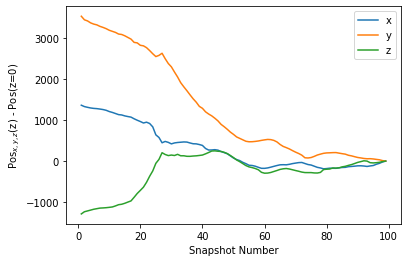

In [34]:
with h5py.File(mpb2,'r') as f:
    pos = f['SubhaloPos'][:]
    snapnum = f['SnapNum'][:]
    subid = f['SubhaloNumber'][:]
    
for i in range(3):
    mpl.plot(snapnum,pos[:,i] - pos[0,i], label=['x','y','z'][i])
    
mpl.legend()
mpl.xlabel('Snapshot Number')
mpl.ylabel('Pos$_{x,y,z}$(z) - Pos(z=0)');

We can also get the image of the merger tree:

In [35]:
image = get(sub['vis']['mergertree_sublink'])
image

'vis_TNG100-1_SubLink_99_31342.png'

In [36]:
print(type(image))

<class 'str'>


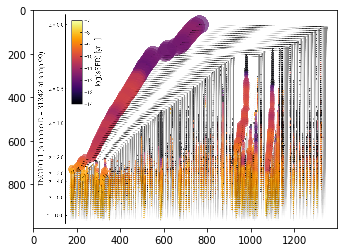

In [37]:
im = io.imread(image)
mpl.imshow(im)
mpl.show()

## 4.8 Numerical Analysis of the Data: Creating 2D Histogram

Now, let's get a cutout of the snapshot data. 

In [38]:
url = sim['snapshots'] + "z=0/"
url

'http://www.tng-project.org/api/TNG100-1/snapshots/z=0/'

In [39]:
snap = get(url)
snap['number'], snap['redshift']

(99, 2.22044604925031e-16)

Find the target Subfind ID at snapshot 99 using the Sublink tree

In [40]:
i = np.where(snapnum == 99)
subid[i]

array([31342], dtype=int32)

In [41]:
subid[:]

array([31342, 31158, 30615, 27447, 26661, 26737, 26782, 26595, 26516,
       26358, 26369, 26170, 26224, 25606, 25376, 25313, 24793, 24716,
       24116, 10604,     0,     0,     0,  8178,  8219,  8111,  8046,
        7719,  7588,  7516,  7417,  7421,  7306,  7313,  7245,  7295,
        7034,  7149,  7286,  7094,  7108,  6921,  6845,  6586,  6465,
        6352,  6271,  5024,  4926,  4949,  5074,  8309,  3460,  3151,
           0,     0,  3136,  5346,  5072,  4966,  4956,  2398,  4299,
        1856,  1485,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,  5519,  4698,  4318,  3709,  2853,
        2210,  2697,  1988,  1783,  2709,  2384,  1766,  4393,  1420,
        3889,  2933,  6621,  2246, 11191, 16743, 11662, 10567,  3663],
      dtype=int32)

Requst the subhalo details, and a snapshot cutout consisting only of Gas fields

In [42]:
sub_prog_url = "http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/31342/"
sub_prog = get(sub_prog_url)
sub_prog['pos_x'], sub_prog['pos_y']

(10900.2, 50857.9)

In [46]:
cutout_request = {'gas':'Coordinates,Masses'}
cutout = get(sub_prog['cutouts']['subhalo'], cutout_request)
cutout

'cutout_31342.hdf5'

Make a quick 2d histogram visualization of the distribution of gas bound to this subhalo, weighted by the log of gas cell mass, and with position relative to the subhalo center

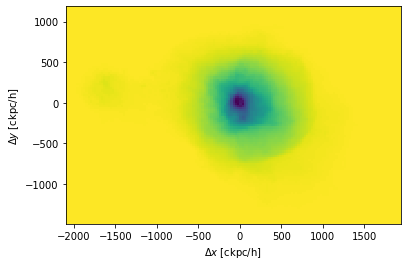

In [47]:
# Keep the following in mind:
# PartType0 - GAS
# PartType1 - DM
# PartType2 - (unused)
# PartType3 - TRACERS
# PartType4 - STARS & WIND PARTICLES
# PartType5 - BLACK HOLES

with h5py.File(cutout,'r') as f:
    x = f['PartType0']['Coordinates'][:,0] - sub_prog['pos_x']
    y = f['PartType0']['Coordinates'][:,1] - sub_prog['pos_y']
    dens = np.log10(f['PartType0']['Masses'][:])
    
mpl.hist2d(x,y,weights=dens,bins=[150,100])
mpl.xlabel('$\Delta x$ [ckpc/h]')
mpl.ylabel('$\Delta y$ [ckpc/h]');

# Thank you!

Thank you to everyone who read this notebook. If there's any question, comments, or errors, here is my contact information.
    
    Hyunwoo Kim
    hk0023@uah.edu
    
 